In [1]:
# importing necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import xarray as xr
import cfgrib
from datetime import date
from datetime import datetime

C:\Users\Thaomy\AppData\Local\Temp\ipykernel_3468\364878693.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Thaomy\Python\envs\GEOL599_env\Lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.26.0
  warnings.warn(


# Data from ERA5

In [2]:
# saved ERA5 data in 3 separate files: Jan-Dec 2022, Jan-Mar 2023, and the first 8 hours of April 2023 to account for UTC
t1 = xr.open_dataset('Third_2022.grib', engine='cfgrib')
t2 = xr.open_dataset('Third_2023.grib', engine='cfgrib')
t3 = xr.open_dataset('Third_2023_1.grib', engine='cfgrib')

In [3]:
# creating a function to import grib to a dataframe and reset the index
# ERA5 data is recorded in UTC time, so I have to convert to PST and delete data from before 2022

def grib_to_df(file):
    df = file.to_dataframe()
    df = df.rename_axis(index={'time':'local_timestamp'}) #renaming because BEACON data has local_timestamp as its index name
    df = df.reset_index(level=['latitude', 'longitude'])
    df.index = df.index - pd.Timedelta(hours=8)
    df = df[df.index >= '2022-01-01 00:00:00']
    
    return df

In [4]:
# converting my 3 grib files into dataframes
df1 = grib_to_df(t1)
df2 = grib_to_df(t2)
df3 = grib_to_df(t3)

In [5]:
df1

,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m
local_timestamp,,,,,,,,,,
2022-01-01 00:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 08:00:00,-1.035744,-1.714338,277.845703,282.468018
2022-01-01 01:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 09:00:00,-0.753844,-1.859745,277.093750,281.544922
2022-01-01 02:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 10:00:00,-0.658079,-1.725183,276.785156,281.122070
2022-01-01 03:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 11:00:00,-0.239666,-1.989239,276.430908,280.528809
2022-01-01 04:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 12:00:00,-0.133812,-2.071154,275.664062,279.626465
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 11:00:00,34.07,-118.34,0,0 days,0.0,2022-12-31 19:00:00,0.828773,2.590117,286.495117,287.786621
2022-12-31 12:00:00,34.07,-118.34,0,0 days,0.0,2022-12-31 20:00:00,1.554169,3.139944,286.178955,288.322998
2022-12-31 13:00:00,34.07,-118.34,0,0 days,0.0,2022-12-31 21:00:00,2.063653,3.618326,286.320557,287.978516


In [6]:
df2

,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m
local_timestamp,,,,,,,,,,
2022-12-31 16:00:00,34.07,-118.34,0,0 days,0.0,2023-01-01 00:00:00,-0.455266,3.384121,285.856689,287.468506
2022-12-31 17:00:00,34.07,-118.34,0,0 days,0.0,2023-01-01 01:00:00,-1.246026,4.020984,285.686768,287.300049
2022-12-31 18:00:00,34.07,-118.34,0,0 days,0.0,2023-01-01 02:00:00,-1.723812,4.245194,285.535889,287.234375
2022-12-31 19:00:00,34.07,-118.34,0,0 days,0.0,2023-01-01 03:00:00,-0.829070,4.775351,285.256836,286.941406
2022-12-31 20:00:00,34.07,-118.34,0,0 days,0.0,2023-01-01 04:00:00,0.340189,4.952047,285.611572,286.719482
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 11:00:00,34.07,-118.34,0,0 days,0.0,2023-03-31 19:00:00,1.009969,1.209412,279.676514,288.489746
2023-03-31 12:00:00,34.07,-118.34,0,0 days,0.0,2023-03-31 20:00:00,1.602100,1.404533,279.687988,289.132812
2023-03-31 13:00:00,34.07,-118.34,0,0 days,0.0,2023-03-31 21:00:00,2.033450,1.432003,279.777344,289.916016


In [7]:
df3

,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m
local_timestamp,,,,,,,,,,
2023-03-31 16:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 00:00:00,3.189467,1.388894,280.806396,289.127686
2023-03-31 17:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 01:00:00,3.152536,0.531579,281.287842,288.406982
2023-03-31 18:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 02:00:00,2.055104,-0.172679,281.851562,287.535889
2023-03-31 19:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 03:00:00,1.264650,-0.975640,281.634766,286.250244
2023-03-31 20:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 04:00:00,0.822586,-1.164404,281.739746,285.718506
2023-03-31 21:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 05:00:00,0.669069,-1.003102,281.522217,285.493408
2023-03-31 22:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 06:00:00,0.427058,-0.796346,281.531738,285.186768
2023-03-31 23:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 07:00:00,0.165246,-0.741711,281.596924,284.980957


In [8]:
# combining the 3 ERA5 dataframes into 1 dataframe
era = pd.concat([df1, df2, df3])

In [9]:
era

,latitude,longitude,number,step,surface,valid_time,u10,v10,d2m,t2m
local_timestamp,,,,,,,,,,
2022-01-01 00:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 08:00:00,-1.035744,-1.714338,277.845703,282.468018
2022-01-01 01:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 09:00:00,-0.753844,-1.859745,277.093750,281.544922
2022-01-01 02:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 10:00:00,-0.658079,-1.725183,276.785156,281.122070
2022-01-01 03:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 11:00:00,-0.239666,-1.989239,276.430908,280.528809
2022-01-01 04:00:00,34.07,-118.34,0,0 days,0.0,2022-01-01 12:00:00,-0.133812,-2.071154,275.664062,279.626465
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 03:00:00,1.264650,-0.975640,281.634766,286.250244
2023-03-31 20:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 04:00:00,0.822586,-1.164404,281.739746,285.718506
2023-03-31 21:00:00,34.07,-118.34,0,0 days,0.0,2023-04-01 05:00:00,0.669069,-1.003102,281.522217,285.493408


In [10]:
# t2m (temperature at 2m) is recorded in Kelvin, so I am converting it into Celsius
# d2m (dewpoint temperature at 2m) is recorded in Kelvins, so I am converting it into Celsius
# to keep it consistent with how BEACON temperature is recorded

era['t2m'] = era['t2m']-273.15
era['d2m'] = era['d2m']-273.15

In [11]:
remove = ['latitude', 'longitude', 'number', 'step', 'surface', 'valid_time']

era.drop(remove, axis=1, inplace= True)
era

,u10,v10,d2m,t2m
local_timestamp,,,,
2022-01-01 00:00:00,-1.035744,-1.714338,4.695709,9.318024
2022-01-01 01:00:00,-0.753844,-1.859745,3.943756,8.394928
2022-01-01 02:00:00,-0.658079,-1.725183,3.635162,7.972076
2022-01-01 03:00:00,-0.239666,-1.989239,3.280914,7.378815
2022-01-01 04:00:00,-0.133812,-2.071154,2.514069,6.476471
...,...,...,...,...
2023-03-31 19:00:00,1.264650,-0.975640,8.484772,13.100250
2023-03-31 20:00:00,0.822586,-1.164404,8.589752,12.568512
2023-03-31 21:00:00,0.669069,-1.003102,8.372223,12.343414


## Data from BEACO2N

In [12]:
# importing packages required to pull data directly from the BEACON website
import requests
import json
import pickle

In [13]:
# because of daylight savings, the original local timestamp had duplicate rows on 11/6/2022 at 1 AM
# so now, local timestamp will be calculated by subtracting 8 from the datetime which is in UTC
# parameters being grabbed are absolute_humidity,co_corrected,pm1,pm10,pm_pt_corrected,rh,tem

filename="http://128.32.208.8/node/220/measurements_all/csv?name=Supersite&interval=60&variables=absolute_humidity,co_corrected,pm1,pm10,pm_pt_corrected,rh,temp&start=2022-01-01%2000:00:0&end=2023-04-01%2000:00:00"
data = pd.read_csv(filename, on_bad_lines="skip",index_col=[0], parse_dates=[0])
data['datetime'] = pd.to_datetime(data['datetime'])
data.index = data['datetime'] - pd.Timedelta(hours=8)

In [14]:
data

,epoch,datetime,node_file_id,absolute_humidity,co_corrected,pm1,pm10,pm_pt_corrected,rh,temp,node_id
datetime,,,,,,,,,,,
2022-01-01 00:00:00,1.641024e+09,2022-01-01 08:00:00,2555094,5.311019,0.334597,8.70952,16.41905,11.550880,57.515230,9.730470,220
2022-01-01 03:00:00,1.641035e+09,2022-01-01 11:00:00,2555222,5.633732,0.298174,11.90047,21.87204,13.428863,66.682610,8.339660,220
2022-01-01 04:00:00,1.641038e+09,2022-01-01 12:00:00,2555249,4.686718,0.212709,3.64789,6.37559,4.635474,52.956370,9.064120,220
2022-01-01 05:00:00,1.641042e+09,2022-01-01 13:00:00,2555308,5.432331,0.304435,6.96667,11.89524,7.682801,65.767100,7.988940,220
2022-01-01 06:00:00,1.641046e+09,2022-01-01 14:00:00,2555354,5.520241,0.315003,6.53271,10.65421,6.025326,72.231110,6.789730,220
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,1.680318e+09,2023-04-01 03:00:00,3534353,7.619524,0.248708,3.24171,6.66114,5.609212,52.350370,17.104149,220
2023-03-31 20:00:00,1.680322e+09,2023-04-01 04:00:00,3534419,7.382031,0.270402,4.26824,7.93647,7.020219,49.730718,17.432927,220
2023-03-31 21:00:00,1.680325e+09,2023-04-01 05:00:00,3534505,7.450208,0.309727,5.96235,10.28235,9.044815,54.316091,16.117617,220


In [15]:
# dropping unnecessary columns
remove = ['epoch', 'datetime', 'node_file_id', 'node_id']

data.drop(remove, axis=1, inplace= True)
data

,absolute_humidity,co_corrected,pm1,pm10,pm_pt_corrected,rh,temp
datetime,,,,,,,
2022-01-01 00:00:00,5.311019,0.334597,8.70952,16.41905,11.550880,57.515230,9.730470
2022-01-01 03:00:00,5.633732,0.298174,11.90047,21.87204,13.428863,66.682610,8.339660
2022-01-01 04:00:00,4.686718,0.212709,3.64789,6.37559,4.635474,52.956370,9.064120
2022-01-01 05:00:00,5.432331,0.304435,6.96667,11.89524,7.682801,65.767100,7.988940
2022-01-01 06:00:00,5.520241,0.315003,6.53271,10.65421,6.025326,72.231110,6.789730
...,...,...,...,...,...,...,...
2023-03-31 19:00:00,7.619524,0.248708,3.24171,6.66114,5.609212,52.350370,17.104149
2023-03-31 20:00:00,7.382031,0.270402,4.26824,7.93647,7.020219,49.730718,17.432927
2023-03-31 21:00:00,7.450208,0.309727,5.96235,10.28235,9.044815,54.316091,16.117617


In [16]:
# merging era dataframe with BEACON dataframe

df = era.merge(data, how='outer', left_index=True, right_index=True)
df

,u10,v10,d2m,t2m,absolute_humidity,co_corrected,pm1,pm10,pm_pt_corrected,rh,temp
2022-01-01 00:00:00,-1.035744,-1.714338,4.695709,9.318024,5.311019,0.334597,8.70952,16.41905,11.550880,57.515230,9.730470
2022-01-01 01:00:00,-0.753844,-1.859745,3.943756,8.394928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,-0.658079,-1.725183,3.635162,7.972076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00,-0.239666,-1.989239,3.280914,7.378815,5.633732,0.298174,11.90047,21.87204,13.428863,66.682610,8.339660
2022-01-01 04:00:00,-0.133812,-2.071154,2.514069,6.476471,4.686718,0.212709,3.64789,6.37559,4.635474,52.956370,9.064120
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,1.264650,-0.975640,8.484772,13.100250,7.619524,0.248708,3.24171,6.66114,5.609212,52.350370,17.104149
2023-03-31 20:00:00,0.822586,-1.164404,8.589752,12.568512,7.382031,0.270402,4.26824,7.93647,7.020219,49.730718,17.432927
2023-03-31 21:00:00,0.669069,-1.003102,8.372223,12.343414,7.450208,0.309727,5.96235,10.28235,9.044815,54.316091,16.117617
2023-03-31 22:00:00,0.427058,-0.796346,8.381744,12.036774,7.315677,0.344345,5.58629,9.06856,7.754307,56.210850,15.250913


# PM at Third
calculating the mean PM2.5 (with standard deviation) at Third Street Elementary during this study period

In [17]:
mean = np.nanmean(df['pm_pt_corrected'])
std = np.nanstd(df['pm_pt_corrected'])

print(mean, std)

10.442868924179372 8.138431663621677


# Regression Models

In [18]:
# importing packages required for running regression models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

## Linear Models With All Data

In [19]:
# creating a function that create a new column that shifts the PM2.5 column back by x (hours)
# then the dataframe will be separated into training data (June 2022 - Mar 2023), validation data (Jan-Feb 2022), and testing data (March-May 2022)
# each dataframe section will be converted to X arrays and y arrays

def get_arrays(hour, df):
    df1 = df.copy()
    df1['pm_shift'] = df1['pm_pt_corrected'].shift(hour, axis=0)
    df1.dropna(how='any', inplace = True)
    
    # interpolating data instead of extrapolating
    train_range = (df1.index >= '2022-06-01 00:00:00')
    train_df = df1.loc[train_range]
    X_train = train_df.loc[:, train_df.columns != 'pm_shift'].to_numpy()
    y_train = np.array(train_df['pm_shift'])
    
    val_range = (df1.index < '2022-03-01 00:00:00')
    val_df = df1.loc[val_range]
    X_val = val_df.loc[:, val_df.columns != 'pm_shift'].to_numpy()
    y_val = np.array(val_df['pm_shift'])
    
    test_range = (df1.index < '2022-06-01 00:00:00') & (df1.index >= '2022-03-01 00:00:00')
    test_df = df1.loc[test_range]
    X_test = test_df.loc[:, test_df.columns != 'pm_shift'].to_numpy()
    y_test = np.array(test_df['pm_shift'])
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [20]:
# same idea as the function above, but there's a difference in the split
# training data (Jan 2022 + July 2022- Mar 2023), validation data (Feb-Mar 2022), and testing data (April-June 2022)

def get_arrays_interpolate_v2(hour, df):
    df1 = df.copy()
    df1['pm_shift'] = df1['pm_pt_corrected'].shift(hour, axis=0)
    df1.dropna(how='any', inplace = True)
    
    # interpolating data instead of extrapolating
    train_range = (df1.index < '2022-02-01 00:00:00') | (df1.index >= '2022-07-01 00:00:00')
    train_df = df1.loc[train_range]
    X_train = train_df.loc[:, train_df.columns != 'pm_shift'].to_numpy()
    y_train = np.array(train_df['pm_shift'])
    
    val_range = (df1.index < '2022-04-01 00:00:00') & (df1.index >= '2022-02-01 00:00:00')
    val_df = df1.loc[val_range]
    X_val = val_df.loc[:, val_df.columns != 'pm_shift'].to_numpy()
    y_val = np.array(val_df['pm_shift'])
    
    test_range = (df1.index < '2022-07-01 00:00:00') & (df1.index >= '2022-04-01 00:00:00')
    test_df = df1.loc[test_range]
    X_test = test_df.loc[:, test_df.columns != 'pm_shift'].to_numpy()
    y_test = np.array(test_df['pm_shift'])
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [22]:
# same idea as the functions above but difference in split
# training data (random 83% of 2022, noted as before), validation data (random 17% of 2022, noted as before), and testing data (Jan-Mar 2023)

def get_arrays_extrapolate(hour, df):
    df1 = df.copy()
    df1['pm_shift'] = df1['pm_pt_corrected'].shift(hour, axis=0)
    df1.dropna(how='any', inplace = True)
    
    # extrapolating data instead of interpolating
    before = df1.loc[df1.index < '2023-01-01 00:00:00']
    after = df1.loc[df1.index >= '2023-01-01 00:00:00']
    Xvar = before.loc[:, before.columns != 'pm_shift'].to_numpy()
    yvar = np.array(before['pm_shift'])
    
    X_train, X_val, y_train, y_val = train_test_split(Xvar, yvar, test_size=0.17)
    
    X_test = after.loc[:, after.columns != 'pm_shift'].to_numpy()
    y_test = np.array(after['pm_shift'])
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [23]:
# same idea as the functions above but difference in split
# training data (random 67% of full period), validation data (random 13% of full period), and testing data (random 20% of full period)
def get_arrays_random(hour, df):
    df1 = df.copy()
    df1['pm_shift'] = df1['pm_pt_corrected'].shift(hour, axis=0)
    df1.dropna(how='any', inplace = True)

    Xvar = df1.loc[:, df1.columns != 'pm_shift'].to_numpy()
    yvar = np.array(df1['pm_shift'])

    X, X_test, y, y_test = train_test_split(Xvar, yvar, test_size=0.20)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.17)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [29]:
# for loop that will cycle through prediction from 1 hour to 24 hours into the future (by adjusting the shift value)
# fits a linear regression model to my training data (splits according to the interpolation v1 function: get_arrays)
# with that model, it predicts the y arrays for the training, validation, and testing X-arays and computes a mean squared error
# appends the empty train_error, valid_error, and test_error with the MSE values and the final output is a dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays(i, df)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameters = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

shift_df = pd.DataFrame(parameters)
shift_df['hour'] = np.arange(1,25,1)
shift_df   

,hour shift,train error,validation error,test error,hour
0,-1,6.697558,9.661472,6.166255,1
1,-2,15.041469,24.217477,14.481867,2
2,-3,21.760228,36.280821,20.893222,3
3,-4,27.356405,46.227364,25.224457,4
4,-5,32.023368,54.493622,28.266711,5
5,-6,35.715908,57.099036,30.701514,6
6,-7,38.561055,60.596708,32.530472,7
7,-8,40.735804,59.053775,34.044355,8
8,-9,42.653638,58.719531,35.686485,9
9,-10,44.694534,57.823588,37.638895,10


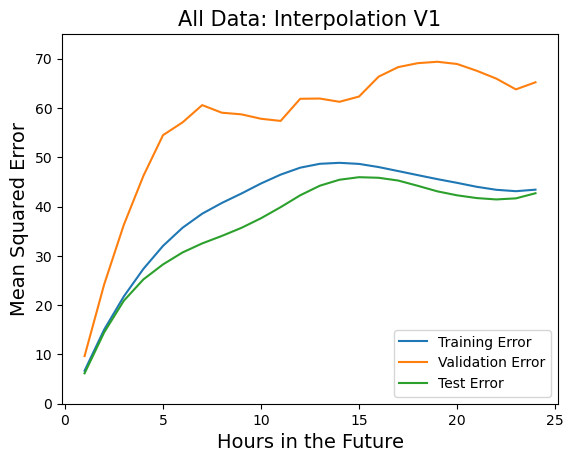

In [30]:
# plots the training, validation, and testing error for linear regression model with interpolation v1 splits

plt.plot('hour', 'train error', data=shift_df, label='Training Error')
plt.plot('hour', 'validation error', data=shift_df, label='Validation Error')
plt.plot('hour', 'test error', data=shift_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('All Data: Interpolation V1', fontsize=15)
plt.ylim(0,75)
plt.legend()

In [31]:
# same for-loop idea as above but using a different split (interpolation v2: get_arrays_interpolate_v2)

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_interpolate_v2(i, df)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameters = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

shift_in2_df = pd.DataFrame(parameters)
shift_in2_df['hour'] = np.arange(1,25,1)
shift_in2_df   

,hour shift,train error,validation error,test error,hour
0,-1,6.871989,8.295240,6.051893,1
1,-2,15.622109,18.742386,14.797141,2
2,-3,22.527200,26.676507,22.618846,3
3,-4,28.493448,30.792144,28.963631,4
4,-5,33.555215,32.907743,33.813939,5
5,-6,37.013792,33.944879,38.182504,6
6,-7,40.014044,33.599959,41.880763,7
7,-8,41.900644,32.470253,45.039826,8
8,-9,43.316318,31.972734,49.155738,9
9,-10,44.688908,32.092258,53.268470,10


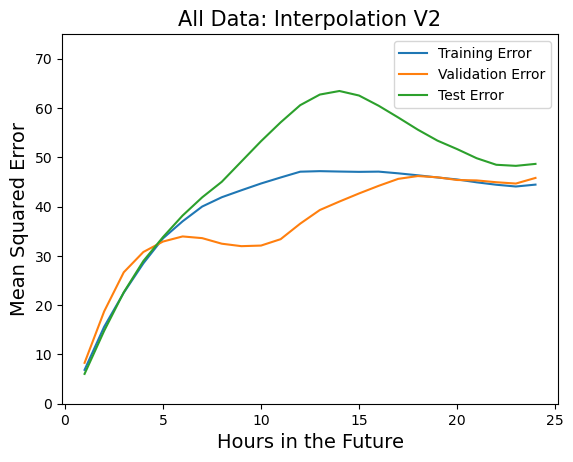

In [32]:
# plots the training, validation, and testing error for linear regression model with interpolation v2 splits

plt.plot('hour', 'train error', data=shift_in2_df, label='Training Error')
plt.plot('hour', 'validation error', data=shift_in2_df, label='Validation Error')
plt.plot('hour', 'test error', data=shift_in2_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('All Data: Interpolation V2', fontsize=15)
plt.ylim(0,75)
plt.legend()

In [33]:
# same for-loop idea as above but using a different split (extrapolation: get_arrays_extrapolate)

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, df)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

shift_ex_df = pd.DataFrame(parameter)
shift_ex_df['hour'] = np.arange(1,25,1)
shift_ex_df   

,hour shift,train error,validation error,test error,hour
0,-1,6.879431,7.857657,6.124162,1
1,-2,16.652798,16.241091,12.576816,2
2,-3,24.337704,24.365825,17.309578,3
3,-4,30.481160,30.370249,21.522402,4
4,-5,35.144483,35.984059,25.134662,5
5,-6,39.830961,33.024687,28.348325,6
6,-7,40.939208,44.063493,30.181371,7
7,-8,43.819827,40.763508,31.824689,8
8,-9,45.347158,44.541907,32.705089,9
9,-10,46.703432,50.164326,32.681332,10


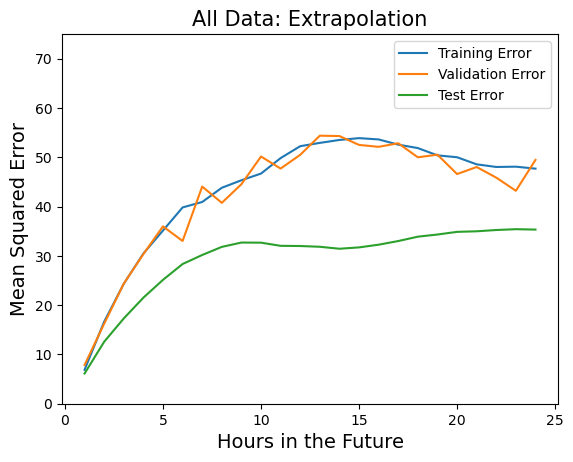

In [34]:
# plots the training, validation, and testing error for linear regression model with extrapolation splits

plt.plot('hour', 'train error', data=shift_ex_df, label='Training Error')
plt.plot('hour', 'validation error', data=shift_ex_df, label='Validation Error')
plt.plot('hour', 'test error', data=shift_ex_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('All Data: Extrapolation', fontsize=15)
plt.ylim(0, 75)
plt.legend()

In [35]:
# same for-loop idea as above but using a different split (random: get_arrays_random)

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_random(i, df)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

shift_ran_df = pd.DataFrame(parameter)
shift_ran_df['hour'] = np.arange(1,25,1)
shift_ran_df   

,hour shift,train error,validation error,test error,hour
0,-1,6.984558,6.469554,6.680423,1
1,-2,15.536277,15.092360,16.852294,2
2,-3,23.561473,22.457742,20.742324,3
3,-4,28.821770,27.349729,28.485608,4
4,-5,33.715637,33.304350,30.970990,5
5,-6,35.440833,39.241988,37.401118,6
6,-7,39.784432,36.458551,38.114116,7
7,-8,40.775425,41.116403,40.082559,8
8,-9,41.448136,43.524660,44.379269,9
9,-10,42.635871,48.157825,45.963709,10


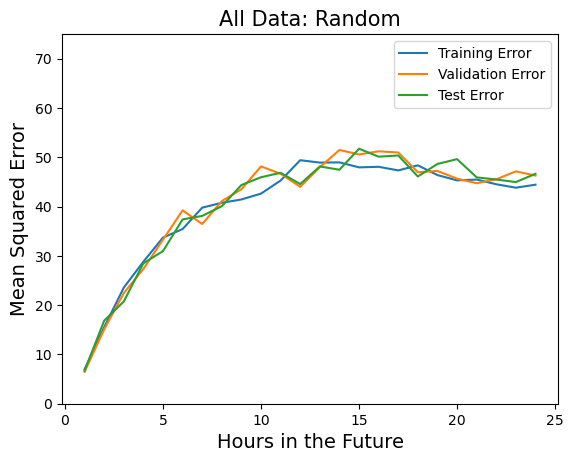

In [36]:
# plots the training, validation, and testing error for linear regression model with random splits

plt.plot('hour', 'train error', data=shift_ran_df, label='Training Error')
plt.plot('hour', 'validation error', data=shift_ran_df, label='Validation Error')
plt.plot('hour', 'test error', data=shift_ran_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('All Data: Random', fontsize=15)
plt.ylim(0, 75)
plt.legend()

## Linear Regression With Only BEACON Data

Testing the different methods of splits with BEACON data only. Will use 'data' dataframe instead of 'df' dataframe

In [41]:
# same for-loop idea as above but using a different split (interpolation v1: get_arrays) and "data" dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays(i, data)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameters = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

bshift_df = pd.DataFrame(parameters)
bshift_df['hour'] = np.arange(1,25,1)
bshift_df

,hour shift,train error,validation error,test error,hour
0,-1,6.730787,12.530949,6.125178,1
1,-2,15.214479,27.926178,14.344845,2
2,-3,22.147879,40.421323,20.696555,3
3,-4,28.005102,49.799872,24.947149,4
4,-5,32.988303,56.081356,27.936231,5
5,-6,37.015668,59.759041,30.543981,6
6,-7,40.144455,61.150175,32.822013,7
7,-8,42.531067,61.388106,34.989948,8
8,-9,44.549683,61.227346,37.362536,9
9,-10,46.568603,61.413250,40.046621,10


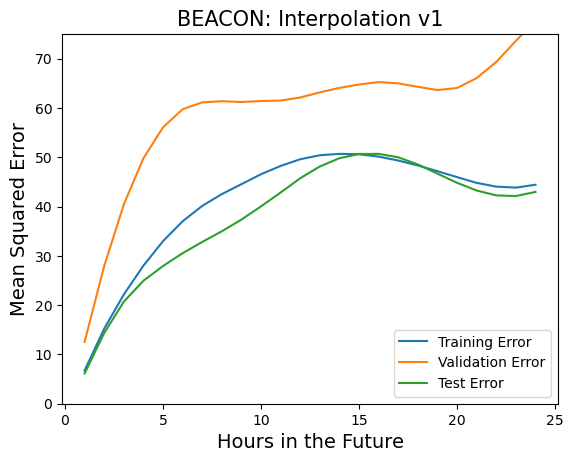

In [42]:
plt.plot('hour', 'train error', data=bshift_df, label='Training Error')
plt.plot('hour', 'validation error', data=bshift_df, label='Validation Error')
plt.plot('hour', 'test error', data=bshift_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('BEACON: Interpolation v1', fontsize=15)
plt.ylim(0,75)
plt.legend()

In [43]:
# same for-loop idea as above but using a different split (interpolation v2: get_arrays_interpolate_v2) and "data" dataframe
shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_interpolate_v2(i, data)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameters = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

bshift_in2_df = pd.DataFrame(parameters)
bshift_in2_df['hour'] = np.arange(1,25,1)
bshift_in2_df

,hour shift,train error,validation error,test error,hour
0,-1,7.298152,9.044761,6.008111,1
1,-2,16.403209,19.859405,14.658055,2
2,-3,23.882307,27.191891,22.300934,3
3,-4,30.134992,31.081243,28.609095,4
4,-5,35.304124,32.819479,33.762521,5
5,-6,39.270260,33.671863,38.356991,6
6,-7,42.099444,33.689298,42.763901,7
7,-8,43.994853,33.469161,47.064024,8
8,-9,45.357218,33.703510,51.644579,9
9,-10,46.745601,34.944034,56.299116,10


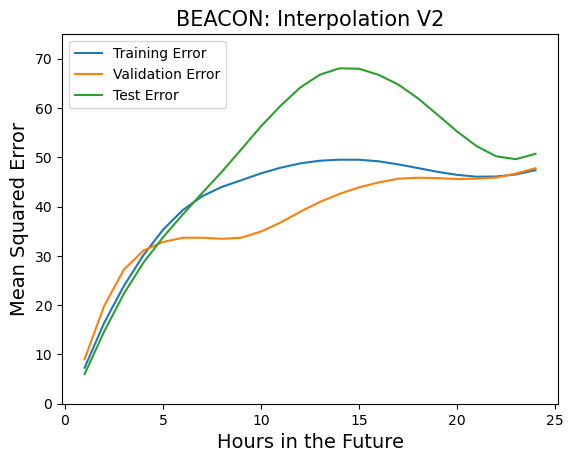

In [45]:
plt.plot('hour', 'train error', data=bshift_in2_df, label='Training Error')
plt.plot('hour', 'validation error', data=bshift_in2_df, label='Validation Error')
plt.plot('hour', 'test error', data=bshift_in2_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('BEACON: Interpolation V2', fontsize=15)
plt.ylim(0,75)
plt.legend()

In [47]:
# same for-loop idea as above but using a different split (extrapolation: get_arrays_extrapolate) and "data" dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

bshift_ex_df = pd.DataFrame(parameter)
bshift_ex_df['hour'] = np.arange(1,25,1)
bshift_ex_df

,hour shift,train error,validation error,test error,hour
0,-1,7.548447,7.326869,6.155127,1
1,-2,17.444327,16.724028,12.836093,2
2,-3,25.608407,23.938239,17.937703,3
3,-4,31.958660,29.372556,22.818543,4
4,-5,35.564721,39.980813,26.918684,5
5,-6,39.997424,40.084973,30.206512,6
6,-7,42.548006,43.749264,32.710840,7
7,-8,45.034559,44.646268,34.204500,8
8,-9,47.684966,44.233696,35.129870,9
9,-10,49.710603,48.499544,35.240471,10


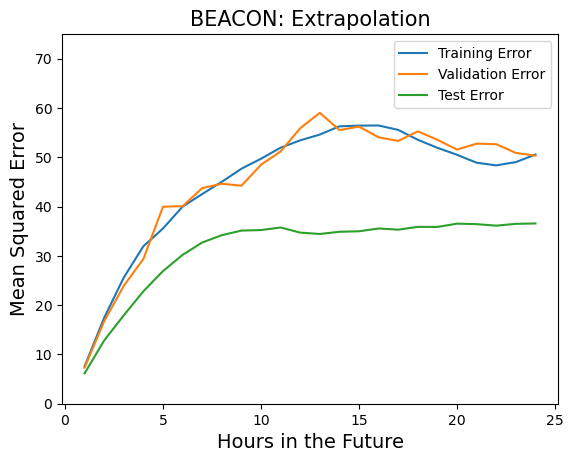

In [48]:
plt.plot('hour', 'train error', data=bshift_ex_df, label='Training Error')
plt.plot('hour', 'validation error', data=bshift_ex_df, label='Validation Error')
plt.plot('hour', 'test error', data=bshift_ex_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('BEACON: Extrapolation', fontsize=15)
plt.ylim(0, 75)
plt.legend()

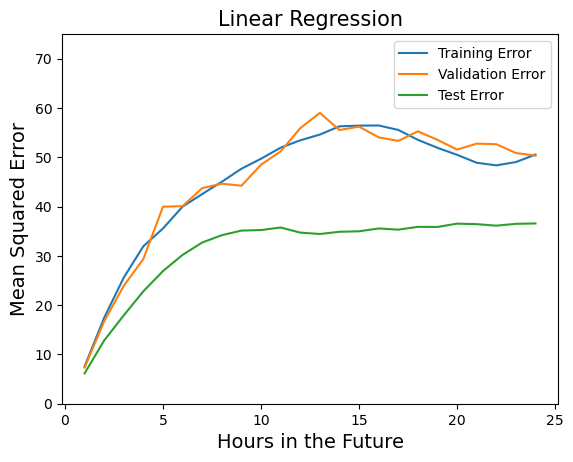

In [49]:
# a duplicate of the graph above with a different title
plt.plot('hour', 'train error', data=bshift_ex_df, label='Training Error')
plt.plot('hour', 'validation error', data=bshift_ex_df, label='Validation Error')
plt.plot('hour', 'test error', data=bshift_ex_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Linear Regression', fontsize=15)
plt.ylim(0, 75)
plt.legend()

In [51]:
# same for-loop idea as above but using a different split (random: get_arrays_random) and "data" dataframe
shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_random(i, data)
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    
    y_train_pred = linear.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = linear.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = linear.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

bshift_ran_df = pd.DataFrame(parameter)
bshift_ran_df['hour'] = np.arange(1,25,1)
bshift_ran_df

,hour shift,train error,validation error,test error,hour
0,-1,7.430659,6.357572,7.199634,1
1,-2,16.621450,17.003659,15.277010,2
2,-3,23.438729,23.288876,25.405988,3
3,-4,29.878075,30.565969,28.443737,4
4,-5,34.063216,34.498621,35.003331,5
5,-6,38.567868,37.548308,36.015956,6
6,-7,40.455553,37.321899,43.100075,7
7,-8,43.220043,41.487991,41.209876,8
8,-9,45.138447,41.109191,44.142223,9
9,-10,46.670688,44.006119,46.999726,10


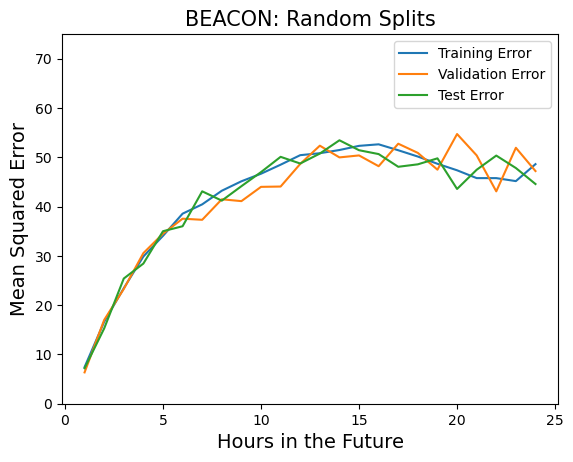

In [52]:
plt.plot('hour', 'train error', data=bshift_ran_df, label='Training Error')
plt.plot('hour', 'validation error', data=bshift_ran_df, label='Validation Error')
plt.plot('hour', 'test error', data=bshift_ran_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('BEACON: Random Splits', fontsize=15)
plt.ylim(0, 75)
plt.legend()

## Ridge Regression

In [55]:
# for-loop to run through different lambda or alpha values (from 0.0 to 1.0) for ridge regression
# output are the MSEs for training, validation, and testing data for the ridge regression at each lambda/alpha value
lamda = np.arange(0, 1.1, .1)
train_error = []
valid_error = []
test_error = []

for i in lamda:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(-1, data)
    
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    
    y_train_pred = ridge.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = ridge.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = ridge.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'lambda': lamda,
             'train error': train_error,
             'validation error': valid_error,
             'test error': test_error}

lambda_df = pd.DataFrame(parameter)
lambda_df

,lambda,train error,validation error,test error
0,0.0,7.654610,6.811708,6.160313
1,0.1,7.404183,8.027213,6.164213
2,0.2,7.614568,7.006059,6.151121
3,0.3,7.544487,7.349072,6.175799
4,0.4,7.573808,7.199624,6.168183
5,0.5,7.628305,6.943465,6.159137
6,0.6,7.507349,7.529585,6.167004
7,0.7,7.415696,7.971449,6.156987
8,0.8,7.347716,8.303624,6.156397
9,0.9,7.544758,7.336199,6.166673


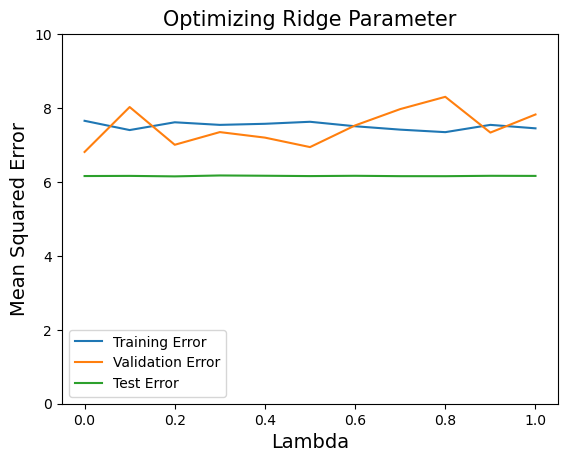

In [56]:
plt.plot('lambda', 'train error', data=lambda_df, label='Training Error')
plt.plot('lambda', 'validation error', data=lambda_df, label='Validation Error')
plt.plot('lambda', 'test error', data=lambda_df, label='Test Error')
plt.xlabel('Lambda', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Optimizing Ridge Parameter', fontsize=15)
plt.ylim(0, 10)
plt.legend()

In [61]:
# for loop that will cycle through prediction from 1 hour to 24 hours into the future (by adjusting the shift value) using ridge regression model with alpha=0.5
# with each hour's model, it predicts the y arrays for the training, validation, and testing X-arrays and computes a mean squared error
# appends the empty train_error, valid_error, and test_error with the MSE values and the final output is a dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    ridge = Ridge(alpha=0.5)
    ridge.fit(X_train, y_train)
    
    y_train_pred = ridge.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = ridge.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = ridge.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

ridge_df = pd.DataFrame(parameter)
ridge_df['hour'] = np.arange(1,25,1)
ridge_df

,hour shift,train error,validation error,test error,hour
0,-1,7.633198,6.937504,6.160500,1
1,-2,17.369491,17.117459,12.795360,2
2,-3,25.273497,25.582047,17.947926,3
3,-4,31.872837,29.817590,22.594085,4
4,-5,36.377801,35.906444,27.047467,5
5,-6,40.512570,37.498716,30.377478,6
6,-7,42.071301,46.128518,32.723620,7
7,-8,44.738125,46.165295,34.198530,8
8,-9,46.474239,50.141797,34.911587,9
9,-10,49.212675,50.897647,35.112272,10


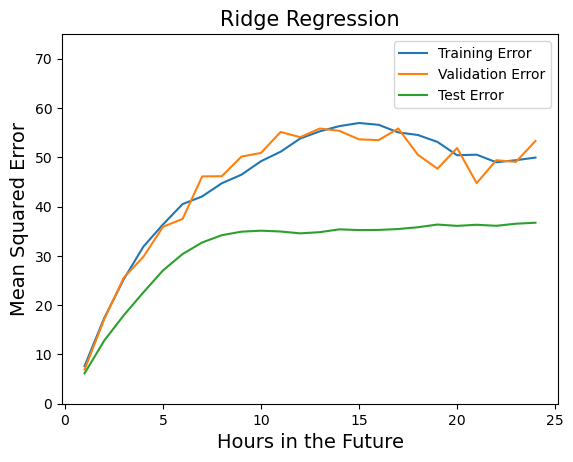

In [62]:
plt.plot('hour', 'train error', data=ridge_df, label='Training Error')
plt.plot('hour', 'validation error', data=ridge_df, label='Validation Error')
plt.plot('hour', 'test error', data=ridge_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Ridge Regression', fontsize=15)
plt.ylim(0, 75)
plt.legend()

## Decision Tree Regressor

In [59]:
# for-loop to run through different max_depth values (from 1 to 10) for decision tree regressor
# output are the MSEs for training, validation, and testing data for the decision tree regressor at each max depth value

depth = np.arange(1, 11, 1)
train_error = []
valid_error = []
test_error = []

for i in depth:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(-1, data)
    
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = tree.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = tree.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'depth': depth,
             'train error': train_error,
             'validation error': valid_error,
             'test error': test_error}

depth_df = pd.DataFrame(parameter)
depth_df

,depth,train error,validation error,test error
0,1,30.197700,30.535824,26.751176
1,2,13.980909,13.841925,12.015919
2,3,9.125739,10.024477,7.637607
3,4,7.832488,8.824576,6.523791
4,5,7.125492,7.672997,6.237621
5,6,6.498889,8.762685,6.388580
6,7,5.670655,9.103752,6.833654
7,8,5.269240,8.968356,6.881604
8,9,4.492199,9.445540,8.679009
9,10,3.531196,11.725835,9.203695


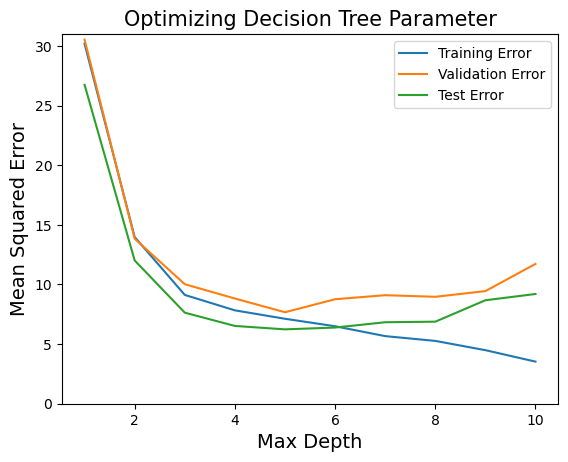

In [60]:
plt.plot('depth', 'train error', data=depth_df, label='Training Error')
plt.plot('depth', 'validation error', data=depth_df, label='Validation Error')
plt.plot('depth', 'test error', data=depth_df, label='Test Error')
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Optimizing Decision Tree Parameter', fontsize=15)
plt.ylim(0, 31)
plt.legend()

In [64]:
# for loop that will cycle through prediction from 1 hour to 24 hours into the future (by adjusting the shift value) using decision tree regressor with max_depth=5
# with each hour's model, it predicts the y arrays for the training, validation, and testing X-arrays and computes a mean squared error
# appends the empty train_error, valid_error, and test_error with the MSE values and the final output is a dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    tree = DecisionTreeRegressor(max_depth=5)
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = tree.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = tree.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

tree_df = pd.DataFrame(parameter)
tree_df['hour'] = np.arange(1,25,1)
tree_df

,hour shift,train error,validation error,test error,hour
0,-1,7.154483,8.553392,6.362303,1
1,-2,16.433149,18.237331,12.725461,2
2,-3,23.154461,23.240374,18.576850,3
3,-4,27.987385,30.240402,23.656933,4
4,-5,31.349352,34.998709,26.884168,5
5,-6,34.605780,35.942765,28.959794,6
6,-7,36.540897,38.002952,29.186923,7
7,-8,38.882105,39.208927,30.011264,8
8,-9,40.940579,41.252694,31.571432,9
9,-10,41.930607,48.710465,30.953975,10


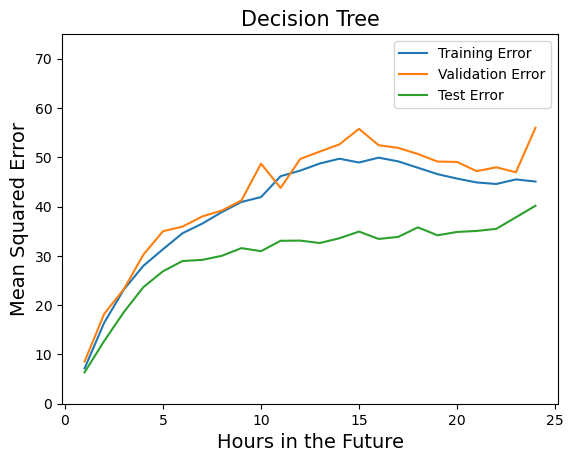

In [65]:
plt.plot('hour', 'train error', data=tree_df, label='Training Error')
plt.plot('hour', 'validation error', data=tree_df, label='Validation Error')
plt.plot('hour', 'test error', data=tree_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Decision Tree', fontsize=15)
plt.ylim(0, 75)
plt.legend()

## Random Forest Regressor

In [68]:
# for-loop to run through different n_estimators values (from 1 to 10) for random forest regressor
# output are the MSEs for training, validation, and testing data for the random forest regressor at each n_estimators value

n_tree = np.arange(1,11,1)
train_error = []
valid_error = []
test_error = []

for i in n_tree:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(-1, data)
    
    forest = RandomForestRegressor(n_estimators= i)
    forest.fit(X_train, y_train)
    
    y_train_pred = forest.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = forest.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = forest.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'n_tree': n_tree,
             'train error': train_error,
             'validation error': valid_error,
             'test error': test_error}

n_tree_df = pd.DataFrame(parameter)
n_tree_df

,n_tree,train error,validation error,test error
0,1,5.057747,15.899908,12.034339
1,2,3.335372,9.466824,8.779842
2,3,2.467930,9.668374,8.563286
3,4,2.138271,9.187241,7.973179
4,5,1.921126,8.789418,7.618584
5,6,1.873730,7.745018,7.193085
6,7,1.624799,7.674631,7.404745
7,8,1.580993,8.893283,7.317032
8,9,1.544100,9.403930,7.241701
9,10,1.485989,7.810424,6.844227


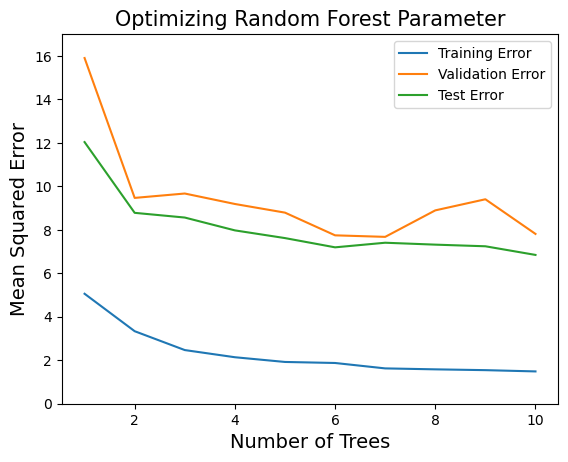

In [69]:
plt.plot('n_tree', 'train error', data=n_tree_df, label='Training Error')
plt.plot('n_tree', 'validation error', data=n_tree_df, label='Validation Error')
plt.plot('n_tree', 'test error', data=n_tree_df, label='Test Error')
plt.xlabel('Number of Trees', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Optimizing Random Forest Parameter', fontsize=15)
plt.ylim(0, 17)
plt.legend()

In [70]:
# for loop that will cycle through prediction from 1 hour to 24 hours into the future (by adjusting the shift value) using random forest regressor with n_estimators=7
# with each hour's model, it predicts the y arrays for the training, validation, and testing X-arrays and computes a mean squared error
# appends the empty train_error, valid_error, and test_error with the MSE values and the final output is a dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    forest = RandomForestRegressor(n_estimators=7)
    forest.fit(X_train, y_train)
    
    y_train_pred = forest.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = forest.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = forest.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

forest_df = pd.DataFrame(parameter)
forest_df['hour'] = np.arange(1,25,1)
forest_df

,hour shift,train error,validation error,test error,hour
0,-1,1.697283,7.407263,7.132454,1
1,-2,3.743809,16.635845,14.633194,2
2,-3,4.761336,26.266728,21.326253,3
3,-4,5.553548,30.935870,27.233065,4
4,-5,6.383537,32.171430,26.592920,5
5,-6,6.697428,31.321618,30.833442,6
6,-7,6.762950,37.186840,30.911789,7
7,-8,7.191995,38.435100,31.599892,8
8,-9,7.411809,39.813588,33.004130,9
9,-10,7.900000,38.550345,33.688990,10


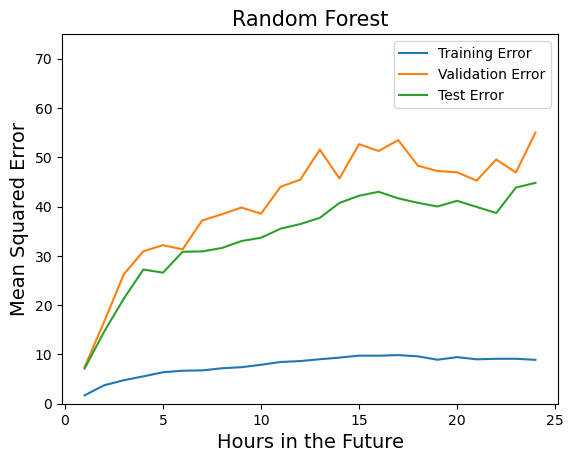

In [71]:
plt.plot('hour', 'train error', data=forest_df, label='Training Error')
plt.plot('hour', 'validation error', data=forest_df, label='Validation Error')
plt.plot('hour', 'test error', data=forest_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Random Forest', fontsize=15)
plt.ylim(0, 75)
plt.legend()

## XGBoost

In [77]:
# for-loop to run through different n_estimators values (from 1 to 10) for boosted tree regression
# output are the MSEs for training, validation, and testing data for the boosted tree regression at each n_estimators value

n_est = np.arange(1,11,1)
train_error = []
valid_error = []
test_error = []

for i in n_est:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(-1, data)
    
    bst = XGBRegressor(n_estimators= i)
    bst.fit(X_train, y_train)
    
    y_train_pred = bst.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = bst.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = bst.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'estimator': n_est,
             'train error': train_error,
             'validation error': valid_error,
             'test error': test_error}

est2_df = pd.DataFrame(parameter)
est2_df

,estimator,train error,validation error,test error
0,1,37.705102,37.931681,32.787938
1,2,22.259338,20.866017,19.237915
2,3,14.046534,15.283667,12.838831
3,4,10.004934,11.447214,9.468616
4,5,7.894356,9.397487,7.776162
5,6,6.852988,7.935313,7.058416
6,7,6.105845,7.895454,6.595852
7,8,5.842789,7.071286,6.340805
8,9,5.470627,7.323310,6.371363
9,10,5.053960,8.498315,6.369002


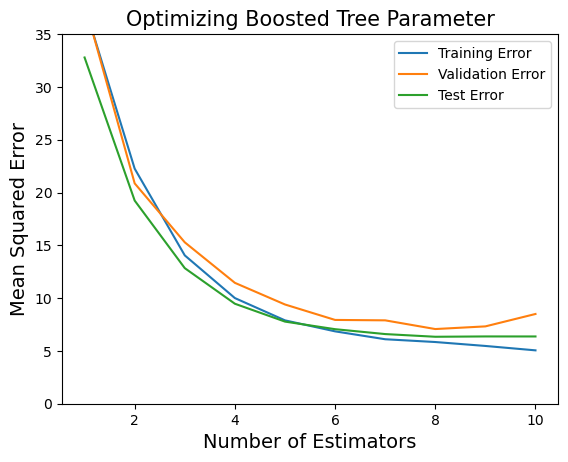

In [79]:
plt.plot('estimator', 'train error', data=est2_df, label='Training Error')
plt.plot('estimator', 'validation error', data=est2_df, label='Validation Error')
plt.plot('estimator', 'test error', data=est2_df, label='Test Error')
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Optimizing Boosted Tree Parameter', fontsize=15)
plt.ylim(0, 35)
plt.legend()

In [80]:
# for-loop to run through different learning_rate values (from 1 to 10) for boosted tree regression with n_estimators=7
# output are the MSEs for training, validation, and testing data for the boosted tree regression at each n_estimators value
learn = np.arange(0,1.1,0.1)
train_error = []
valid_error = []
test_error = []

for i in learn:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(-1, data)
    
    bst = XGBRegressor(n_estimators=8, learning_rate= i)
    bst.fit(X_train, y_train)

    y_train_pred = bst.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = bst.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = bst.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'learn rate': learn,
             'train error': train_error,
             'validation error': valid_error,
             'test error': test_error}

learn_df = pd.DataFrame(parameter)
learn_df

,learn rate,train error,validation error,test error
0,0.0,69.786022,66.507907,60.706266
1,0.1,18.510370,18.875389,16.298110
2,0.2,7.851384,9.151692,7.778841
3,0.3,5.559743,8.874610,6.519503
4,0.4,5.160272,7.520839,6.517359
5,0.5,4.866871,7.802475,6.310223
6,0.6,4.686556,8.638246,6.618192
7,0.7,4.811938,8.096630,6.545739
8,0.8,4.479377,8.790429,7.218666
9,0.9,4.834568,8.603974,6.866095


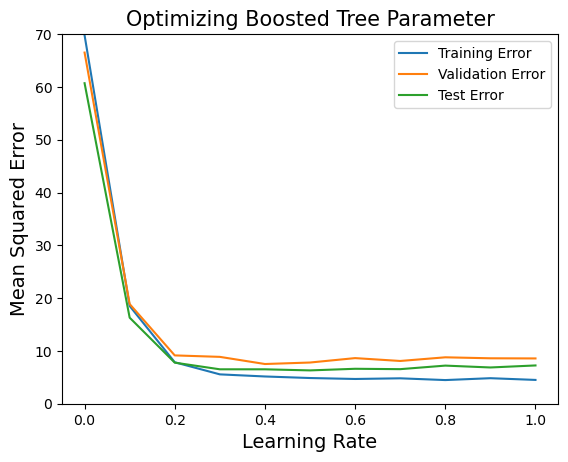

In [81]:
plt.plot('learn rate', 'train error', data=learn_df, label='Training Error')
plt.plot('learn rate', 'validation error', data=learn_df, label='Validation Error')
plt.plot('learn rate', 'test error', data=learn_df, label='Test Error')
plt.xlabel('Learning Rate', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Optimizing Boosted Tree Parameter', fontsize=15)
plt.ylim(0, 70)
plt.legend()

In [82]:
# for loop that will cycle through prediction from 1 hour to 24 hours into the future (by adjusting the shift value) using boosted tree regression with n_estimators=8 and learning_rate=0.4
# with each hour's model, it predicts the y arrays for the training, validation, and testing X-arrays and computes a mean squared error
# appends the empty train_error, valid_error, and test_error with the MSE values and the final output is a dataframe

shift = np.arange(-1, -25, -1)
train_error = []
valid_error = []
test_error = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    bst = XGBRegressor(n_estimators=8, learning_rate=0.4)
    bst.fit(X_train, y_train)
    
    y_train_pred = bst.predict(X_train)
    train_err = mean_squared_error(y_train, y_train_pred)
    
    y_val_pred = bst.predict(X_val)
    val_err = mean_squared_error(y_val, y_val_pred)
    
    y_test_pred = bst.predict(X_test)
    test_err = mean_squared_error(y_test, y_test_pred)

    train_error.append(train_err)
    valid_error.append(val_err)
    test_error.append(test_err)
    
parameter = {'hour shift': shift,
              'train error': train_error,
              'validation error': valid_error,
              'test error': test_error}

bst_df = pd.DataFrame(parameter)
bst_df['hour'] = np.arange(1,25,1)
bst_df

,hour shift,train error,validation error,test error,hour
0,-1,5.141987,7.883306,6.292283,1
1,-2,11.219038,17.987279,13.338439,2
2,-3,16.478848,22.007987,18.724973,3
3,-4,19.974348,27.074154,22.421970,4
4,-5,22.439327,34.334188,25.037343,5
5,-6,23.364479,34.114229,26.741763,6
6,-7,25.278598,35.765600,29.006080,7
7,-8,25.247774,42.417419,29.757206,8
8,-9,28.265855,37.212933,29.794580,9
9,-10,29.429099,36.446190,31.871750,10


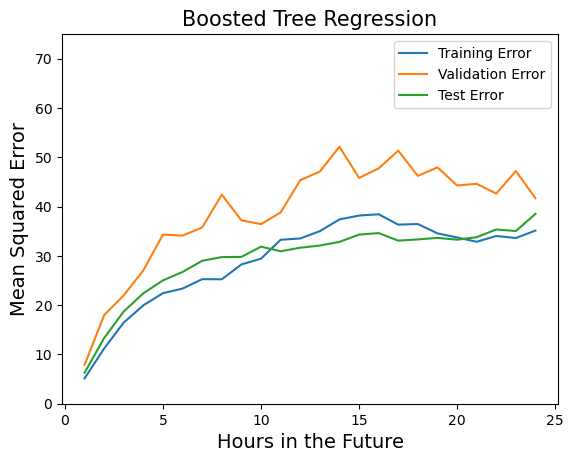

In [83]:
plt.plot('hour', 'train error', data=bst_df, label='Training Error')
plt.plot('hour', 'validation error', data=bst_df, label='Validation Error')
plt.plot('hour', 'test error', data=bst_df, label='Test Error')
plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Boosted Tree Regression', fontsize=15)
plt.ylim(0, 75)
plt.legend()

# Permutation Feature Importance

In [84]:
from sklearn.inspection import permutation_importance

In [85]:
# for-loop that generates a linear regression model to forecast x hours into the future (shifts 1 to 24)
# then calculates the feature importance (mean and standard deviation) for each feature or variable at each hour-model
# Empty lists created for each feature and appended with the importance values (ex: A is mean importance for absolute humidity, AS is std importance for absolute humidity)
# final output is a dataframe

shift = np.arange(-1, -25, -1)
A = []
AS = []
C = []
CS = []
P1 = []
P1S = []
P10 = []
P10S = []
P25 = []
P25S = []
R = []
RS = []
T = []
TS = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    linear = LinearRegression().fit(X_train, y_train)
    result = permutation_importance(linear, X_val, y_val, n_repeats=10,
                                    scoring = 'neg_mean_squared_error', random_state=0)
    A.append(result.importances_mean[0])
    AS.append(result.importances_std[0])
    C.append(result.importances_mean[1])
    CS.append(result.importances_std[1])
    P1.append(result.importances_mean[2])
    P1S.append(result.importances_std[2])
    P10.append(result.importances_mean[3])
    P10S.append(result.importances_std[3])
    P25.append(result.importances_mean[4])
    P25S.append(result.importances_std[4])
    R.append(result.importances_mean[5])
    RS.append(result.importances_std[5])
    T.append(result.importances_mean[6])
    TS.append(result.importances_std[6])
parameter = {'hour shift':shift, 'AbsH':A, 'AbsH STD':AS, 'CO':C, 'CO STD':CS, 
             'PM1':P1, 'PM1 STD':P1S, 'PM10':P10, 'PM10 STD':P10S, 'PM2.5':P25, 'PM2.5 STD':P25S, 
             'RH':R, 'RH STD':RS, 'Temp':T, 'Temp STD':TS}

linear_pi_df = pd.DataFrame(parameter)
linear_pi_df['hour'] = np.arange(1,25,1)
linear_pi_df

,hour shift,AbsH,AbsH STD,CO,CO STD,PM1,PM1 STD,PM10,PM10 STD,PM2.5,PM2.5 STD,RH,RH STD,Temp,Temp STD,hour
0,-1,0.108594,0.022455,-0.004511,0.024264,3.060605,0.218761,6.693413,0.239802,99.842559,2.448197,0.015079,0.006858,0.000754,0.009924,1
1,-2,0.024747,0.021658,-0.000252,0.009549,10.956694,0.561142,28.395875,0.681880,67.859803,1.263366,0.482708,0.095648,0.118684,0.037816,2
2,-3,-0.016934,0.010319,-0.013687,0.023150,15.507616,0.910088,49.805430,2.374574,31.929409,1.736768,1.074278,0.135649,0.285977,0.072115,3
3,-4,0.200489,0.067656,0.207544,0.057150,18.441184,0.839688,70.281246,1.680115,21.101158,0.714141,3.704240,0.358929,2.342243,0.253968,4
4,-5,0.663973,0.140768,0.816974,0.164691,27.323398,1.498081,91.037638,2.999879,4.920894,0.600188,4.289918,0.578055,4.659261,0.466375,5
5,-6,2.804655,0.471689,1.017377,0.309910,6.707174,0.701807,60.688945,2.824634,4.189870,0.532981,13.581267,0.960043,9.922392,0.818483,6
6,-7,5.571635,0.741443,1.735463,0.319996,2.382372,0.462907,43.309662,2.330027,2.297411,0.352195,24.259000,1.329438,19.733501,0.943883,7
7,-8,6.572594,0.451744,2.457121,0.261432,0.340999,0.110574,24.503664,1.449700,1.503360,0.284699,27.037884,1.647187,26.488555,1.607599,8
8,-9,7.384033,0.768908,1.879455,0.282157,0.398192,0.113074,15.102333,0.909288,1.901643,0.242951,33.250361,1.434635,28.968642,1.755979,9
9,-10,4.469783,0.521578,2.016119,0.269543,1.074123,0.228717,9.886966,0.713305,1.301988,0.172969,23.775956,1.592517,25.218000,1.171685,10


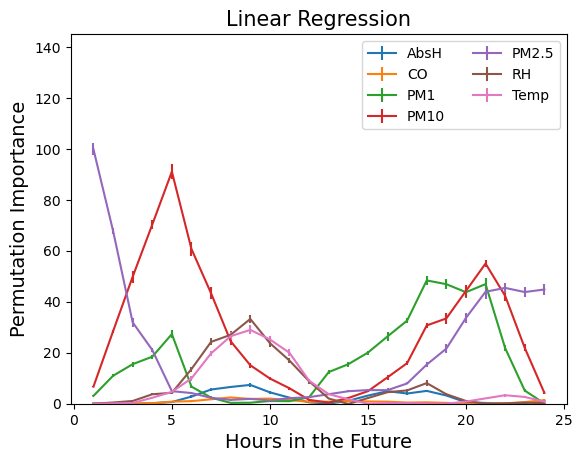

In [86]:
# plots mean value of feature importance for each variable/feature, along with their respective standard deviation across all forecasting linear regression models
plt.errorbar('hour', 'AbsH', 'AbsH STD', data=linear_pi_df)
plt.errorbar('hour', 'CO', 'CO STD', data=linear_pi_df)
plt.errorbar('hour', 'PM1', 'PM1 STD', data=linear_pi_df)
plt.errorbar('hour', 'PM10', 'PM10 STD', data=linear_pi_df)
plt.errorbar('hour', 'PM2.5', 'PM2.5 STD', data=linear_pi_df)
plt.errorbar('hour', 'RH', 'RH STD', data=linear_pi_df)
plt.errorbar('hour', 'Temp', 'Temp STD', data=linear_pi_df)

plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Linear Regression', fontsize=15)
plt.ylim(0, 145)
plt.legend(ncols=2)

In [87]:
# same for-loop idea as above but with ridge regression (alpha=0.5)

shift = np.arange(-1, -25, -1)
A = []
AS = []
C = []
CS = []
P1 = []
P1S = []
P10 = []
P10S = []
P25 = []
P25S = []
R = []
RS = []
T = []
TS = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    ridge = Ridge(alpha=0.5).fit(X_train, y_train)
    result = permutation_importance(ridge, X_val, y_val, n_repeats=10,
                                    scoring = 'neg_mean_squared_error', random_state=0)
    A.append(result.importances_mean[0])
    AS.append(result.importances_std[0])
    C.append(result.importances_mean[1])
    CS.append(result.importances_std[1])
    P1.append(result.importances_mean[2])
    P1S.append(result.importances_std[2])
    P10.append(result.importances_mean[3])
    P10S.append(result.importances_std[3])
    P25.append(result.importances_mean[4])
    P25S.append(result.importances_std[4])
    R.append(result.importances_mean[5])
    RS.append(result.importances_std[5])
    T.append(result.importances_mean[6])
    TS.append(result.importances_std[6])
parameter = {'hour shift':shift, 'AbsH':A, 'AbsH STD':AS, 'CO':C, 'CO STD':CS, 
             'PM1':P1, 'PM1 STD':P1S, 'PM10':P10, 'PM10 STD':P10S, 'PM2.5':P25, 'PM2.5 STD':P25S, 
             'RH':R, 'RH STD':RS, 'Temp':T, 'Temp STD':TS}

ridge_pi_df = pd.DataFrame(parameter)
ridge_pi_df['hour'] = np.arange(1,25,1)
ridge_pi_df

,hour shift,AbsH,AbsH STD,CO,CO STD,PM1,PM1 STD,PM10,PM10 STD,PM2.5,PM2.5 STD,RH,RH STD,Temp,Temp STD,hour
0,-1,0.038369,0.012804,0.024319,0.022886,2.427594,0.161284,5.949073,0.256831,105.514873,2.214195,0.181391,0.029539,-0.002416,0.003209,1
1,-2,0.048011,0.033350,-0.004586,0.002708,8.248576,0.372724,27.688555,0.942232,64.620074,1.417919,0.285419,0.077445,0.089414,0.024260,2
2,-3,0.036768,0.024142,0.033302,0.040950,15.617224,0.922148,49.937255,1.629363,36.423401,1.456078,1.104692,0.182004,0.168599,0.052773,3
3,-4,0.066823,0.069920,0.078437,0.093188,12.321326,0.925685,69.846972,2.199373,23.111315,0.868617,4.148592,0.546346,1.526251,0.391377,4
4,-5,0.743138,0.166195,0.790025,0.145774,14.548607,0.686200,74.320367,1.842295,9.586130,0.595564,8.535668,0.483411,4.676678,0.622112,5
5,-6,2.557586,0.350935,1.418714,0.291389,9.885205,0.809721,66.469159,2.971516,3.882652,0.644626,13.191849,0.871013,10.271498,0.830515,6
6,-7,7.580482,0.670648,1.350909,0.372704,2.966819,0.353616,47.611682,1.490464,2.390442,0.335541,26.211104,1.812429,18.279773,1.335872,7
7,-8,7.895099,0.507077,2.055599,0.499084,0.652387,0.195539,36.887183,1.467967,1.777020,0.195454,30.934907,1.130581,26.223001,1.200184,8
8,-9,7.436463,0.714789,1.668884,0.437020,0.098034,0.064137,21.627276,0.877991,1.352903,0.230804,27.538794,0.863014,30.085999,1.413432,9
9,-10,4.683939,0.584939,1.561453,0.305953,2.795611,0.210097,7.374799,0.374470,2.176109,0.236629,26.977827,0.593504,26.986707,1.519701,10


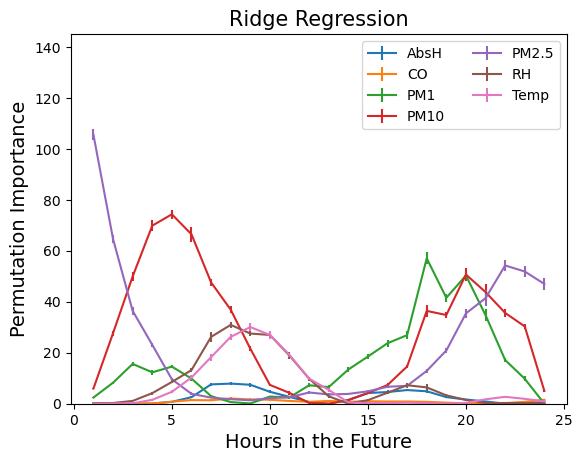

In [88]:
plt.errorbar('hour', 'AbsH', 'AbsH STD', data=ridge_pi_df)
plt.errorbar('hour', 'CO', 'CO STD', data=ridge_pi_df)
plt.errorbar('hour', 'PM1', 'PM1 STD', data=ridge_pi_df)
plt.errorbar('hour', 'PM10', 'PM10 STD', data=ridge_pi_df)
plt.errorbar('hour', 'PM2.5', 'PM2.5 STD', data=ridge_pi_df)
plt.errorbar('hour', 'RH', 'RH STD', data=ridge_pi_df)
plt.errorbar('hour', 'Temp', 'Temp STD', data=ridge_pi_df)

plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Ridge Regression', fontsize=15)
plt.ylim(0, 145)
plt.legend(ncols=2)

In [89]:
# same for-loop idea as above but with decision tree regressor (nax_depth=5)

shift = np.arange(-1, -25, -1)
A = []
AS = []
C = []
CS = []
P1 = []
P1S = []
P10 = []
P10S = []
P25 = []
P25S = []
R = []
RS = []
T = []
TS = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
    result = permutation_importance(tree, X_val, y_val, n_repeats=10,
                                    scoring = 'neg_mean_squared_error', random_state=0)
    A.append(result.importances_mean[0])
    AS.append(result.importances_std[0])
    C.append(result.importances_mean[1])
    CS.append(result.importances_std[1])
    P1.append(result.importances_mean[2])
    P1S.append(result.importances_std[2])
    P10.append(result.importances_mean[3])
    P10S.append(result.importances_std[3])
    P25.append(result.importances_mean[4])
    P25S.append(result.importances_std[4])
    R.append(result.importances_mean[5])
    RS.append(result.importances_std[5])
    T.append(result.importances_mean[6])
    TS.append(result.importances_std[6])
parameter = {'hour shift':shift, 'AbsH':A, 'AbsH STD':AS, 'CO':C, 'CO STD':CS, 
             'PM1':P1, 'PM1 STD':P1S, 'PM10':P10, 'PM10 STD':P10S, 'PM2.5':P25, 'PM2.5 STD':P25S, 
             'RH':R, 'RH STD':RS, 'Temp':T, 'Temp STD':TS}

tree_pi_df = pd.DataFrame(parameter)
tree_pi_df['hour'] = np.arange(1,25,1)
tree_pi_df

,hour shift,AbsH,AbsH STD,CO,CO STD,PM1,PM1 STD,PM10,PM10 STD,PM2.5,PM2.5 STD,RH,RH STD,Temp,Temp STD,hour
0,-1,0.000000,0.000000,0.007232,0.068700,0.090510,0.053632,3.816416,0.189474,128.356925,4.558354,3.456404,0.446623,0.000000,0.000000,1
1,-2,1.913770,0.668884,0.247688,0.114649,0.204401,0.017389,8.775276,0.554796,74.309953,2.269958,0.609582,0.203923,1.611592,0.328279,2
2,-3,1.668283,0.361153,0.052877,0.057458,8.871307,0.754730,35.978364,1.381219,10.021881,0.362166,0.270322,0.245595,1.628004,0.648062,3
3,-4,0.228244,0.217183,-0.026927,0.292606,5.474150,0.519820,54.022006,1.395002,1.174425,0.195242,1.236353,0.204695,4.603131,0.799366,4
4,-5,4.083424,0.610861,0.890179,0.353796,11.229530,1.089157,40.659887,1.578310,1.992704,0.276608,0.579182,0.348901,1.587191,0.246787,5
5,-6,4.734929,0.478271,3.193638,0.578782,9.959991,1.060910,41.296624,1.808307,1.899340,0.341800,2.652700,0.654597,1.746674,0.401912,6
6,-7,3.551664,0.802800,4.108305,0.349807,7.541289,0.391348,46.545912,2.828300,1.301570,0.282555,6.294625,1.230102,2.434194,0.340211,7
7,-8,6.802762,1.641745,2.980552,0.538382,12.115769,0.876726,40.667901,2.454262,3.426243,0.279459,2.979706,0.529865,6.174247,0.718049,8
8,-9,9.606242,0.989289,8.677546,0.923941,7.435801,0.240714,35.438009,2.098278,0.584912,0.168151,0.608002,0.356991,5.822437,1.186845,9
9,-10,2.730767,0.952277,3.620013,0.599384,2.401284,0.295881,25.598875,1.274137,3.248186,0.499198,0.395078,0.521185,2.686064,0.354783,10


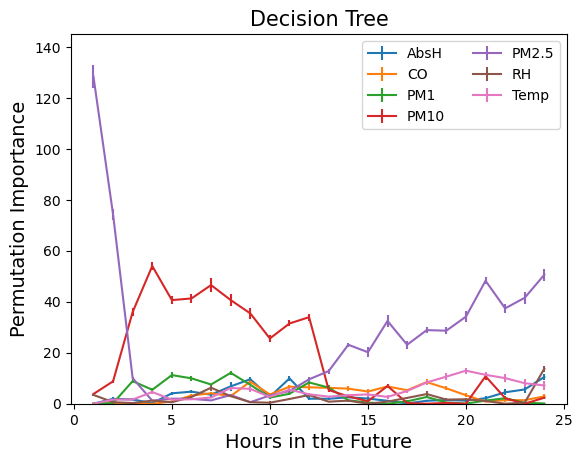

In [90]:
plt.errorbar('hour', 'AbsH', 'AbsH STD', data=tree_pi_df)
plt.errorbar('hour', 'CO', 'CO STD', data=tree_pi_df)
plt.errorbar('hour', 'PM1', 'PM1 STD', data=tree_pi_df)
plt.errorbar('hour', 'PM10', 'PM10 STD', data=tree_pi_df)
plt.errorbar('hour', 'PM2.5', 'PM2.5 STD', data=tree_pi_df)
plt.errorbar('hour', 'RH', 'RH STD', data=tree_pi_df)
plt.errorbar('hour', 'Temp', 'Temp STD', data=tree_pi_df)

plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Decision Tree', fontsize=15)
plt.ylim(0, 145)
plt.legend(ncols=2)

In [91]:
# same for-loop idea as above but with random forest regressor (n_estimators=7)

shift = np.arange(-1, -25, -1)
A = []
AS = []
C = []
CS = []
P1 = []
P1S = []
P10 = []
P10S = []
P25 = []
P25S = []
R = []
RS = []
T = []
TS = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    forest = RandomForestRegressor(n_estimators=7).fit(X_train, y_train)
    result = permutation_importance(forest, X_val, y_val, n_repeats=10,
                                    scoring = 'neg_mean_squared_error', random_state=0)
    A.append(result.importances_mean[0])
    AS.append(result.importances_std[0])
    C.append(result.importances_mean[1])
    CS.append(result.importances_std[1])
    P1.append(result.importances_mean[2])
    P1S.append(result.importances_std[2])
    P10.append(result.importances_mean[3])
    P10S.append(result.importances_std[3])
    P25.append(result.importances_mean[4])
    P25S.append(result.importances_std[4])
    R.append(result.importances_mean[5])
    RS.append(result.importances_std[5])
    T.append(result.importances_mean[6])
    TS.append(result.importances_std[6])
parameter = {'hour shift':shift, 'AbsH':A, 'AbsH STD':AS, 'CO':C, 'CO STD':CS, 
             'PM1':P1, 'PM1 STD':P1S, 'PM10':P10, 'PM10 STD':P10S, 'PM2.5':P25, 'PM2.5 STD':P25S, 
             'RH':R, 'RH STD':RS, 'Temp':T, 'Temp STD':TS}

forest_pi_df = pd.DataFrame(parameter)
forest_pi_df['hour'] = np.arange(1,25,1)
forest_pi_df

,hour shift,AbsH,AbsH STD,CO,CO STD,PM1,PM1 STD,PM10,PM10 STD,PM2.5,PM2.5 STD,RH,RH STD,Temp,Temp STD,hour
0,-1,0.861069,0.196359,0.513069,0.271393,1.301193,0.181015,1.158845,0.153100,121.538052,3.385582,1.004440,0.152455,1.026869,0.136640,1
1,-2,1.861327,0.253379,2.102215,0.514733,4.028759,0.304046,3.686244,0.576208,78.435478,3.011953,1.691054,0.480517,1.338993,0.251903,2
2,-3,6.166489,0.719182,2.570607,0.559333,3.026324,0.201764,49.673784,2.138151,17.766748,1.074459,2.201829,0.343618,3.604886,0.598063,3
3,-4,7.225126,0.908292,3.997449,0.466571,13.955684,0.516419,61.448972,3.512332,8.098070,0.320427,2.710925,0.496737,5.873795,0.815590,4
4,-5,7.615704,0.915663,3.558664,0.464698,11.137173,0.679094,50.645498,2.048129,6.992237,0.504216,1.810122,0.611766,3.405265,0.596758,5
5,-6,8.329555,0.915166,5.079670,0.881635,12.943452,0.778135,65.029652,3.174087,9.228085,0.968393,4.180943,0.833421,4.432249,0.709021,6
6,-7,8.389078,1.132000,7.679536,1.197828,18.758023,0.932958,74.015551,4.493485,12.061807,1.579072,4.665823,0.877295,5.656696,0.610021,7
7,-8,12.900914,1.212115,10.948178,1.361522,19.066668,1.529626,56.490838,2.342628,12.587365,0.705801,6.535001,0.807667,7.352633,0.806076,8
8,-9,11.057224,0.865898,10.236821,0.800894,14.545129,0.818685,46.102174,2.121295,6.174114,0.475322,4.936930,0.501862,8.905826,0.658711,9
9,-10,7.175042,1.086497,14.126725,1.585098,14.254570,0.779997,45.969140,2.244267,7.225564,0.780419,8.543547,0.908731,6.177775,0.844758,10


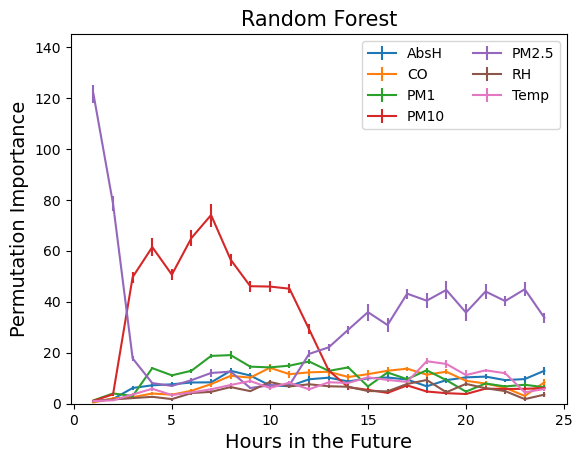

In [92]:
plt.errorbar('hour', 'AbsH', 'AbsH STD', data=forest_pi_df)
plt.errorbar('hour', 'CO', 'CO STD', data=forest_pi_df)
plt.errorbar('hour', 'PM1', 'PM1 STD', data=forest_pi_df)
plt.errorbar('hour', 'PM10', 'PM10 STD', data=forest_pi_df)
plt.errorbar('hour', 'PM2.5', 'PM2.5 STD', data=forest_pi_df)
plt.errorbar('hour', 'RH', 'RH STD', data=forest_pi_df)
plt.errorbar('hour', 'Temp', 'Temp STD', data=forest_pi_df)

plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Random Forest', fontsize=15)
plt.ylim(0, 145)
plt.legend(ncols=2)

In [94]:
# same for-loop idea as above but with boosted tree regression (n_estimators=8, learning_rate=0.4)

shift = np.arange(-1, -25, -1)
A = []
AS = []
C = []
CS = []
P1 = []
P1S = []
P10 = []
P10S = []
P25 = []
P25S = []
R = []
RS = []
T = []
TS = []

for i in shift:
    X_train, y_train, X_val, y_val, X_test, y_test = get_arrays_extrapolate(i, data)
    
    bst = XGBRegressor(n_estimators=8, learning_rate=0.4).fit(X_train, y_train)
    result = permutation_importance(bst, X_val, y_val, n_repeats=10,
                                    scoring = 'neg_mean_squared_error', random_state=0)
    A.append(result.importances_mean[0])
    AS.append(result.importances_std[0])
    C.append(result.importances_mean[1])
    CS.append(result.importances_std[1])
    P1.append(result.importances_mean[2])
    P1S.append(result.importances_std[2])
    P10.append(result.importances_mean[3])
    P10S.append(result.importances_std[3])
    P25.append(result.importances_mean[4])
    P25S.append(result.importances_std[4])
    R.append(result.importances_mean[5])
    RS.append(result.importances_std[5])
    T.append(result.importances_mean[6])
    TS.append(result.importances_std[6])
parameter = {'hour shift':shift, 'AbsH':A, 'AbsH STD':AS, 'CO':C, 'CO STD':CS, 
             'PM1':P1, 'PM1 STD':P1S, 'PM10':P10, 'PM10 STD':P10S, 'PM2.5':P25, 'PM2.5 STD':P25S, 
             'RH':R, 'RH STD':RS, 'Temp':T, 'Temp STD':TS}

bst_pi_df = pd.DataFrame(parameter)
bst_pi_df['hour'] = np.arange(1,25,1)
bst_pi_df

,hour shift,AbsH,AbsH STD,CO,CO STD,PM1,PM1 STD,PM10,PM10 STD,PM2.5,PM2.5 STD,RH,RH STD,Temp,Temp STD,hour
0,-1,1.005521,0.169009,0.699740,0.113206,1.087285,0.130366,2.647382,0.113464,105.772433,3.413862,1.300992,0.239153,0.567917,0.150871,1
1,-2,0.953490,0.198823,1.719843,0.250051,2.511604,0.265144,7.056596,0.241805,58.829475,1.375548,1.928050,0.228944,1.261097,0.278014,2
2,-3,3.718518,0.536055,1.925668,0.271547,5.198114,0.384242,32.673553,2.203251,22.461904,0.950315,1.866870,0.392458,1.215907,0.244707,3
3,-4,3.846955,0.682576,2.314772,0.487793,7.954811,0.671523,44.279762,1.241495,4.025738,0.633752,1.345315,0.469936,3.561517,0.557302,4
4,-5,4.717620,0.842572,3.692978,0.533007,3.826514,0.369816,53.895766,1.772411,5.193683,0.319659,3.739572,0.251341,2.876864,0.465436,5
5,-6,4.624780,0.515528,4.972449,0.616140,7.588669,0.582033,51.625732,1.679162,3.277510,0.392508,2.879345,0.321163,2.615185,0.465138,6
6,-7,8.760584,1.390560,5.495568,0.481876,4.867479,0.266672,51.943745,3.463200,1.694910,0.442131,1.235751,0.373611,4.322808,0.679679,7
7,-8,6.923504,0.689020,8.966044,0.602516,10.977527,0.495455,38.926584,2.050926,2.179910,0.502815,4.853774,0.577489,4.119031,0.425368,8
8,-9,6.975582,1.339743,9.442061,0.735833,9.564412,0.731119,41.880900,1.642427,4.382385,0.379929,4.147678,0.441528,4.776652,0.601590,9
9,-10,8.955222,0.921373,10.607009,0.864668,8.172493,0.760391,41.683852,1.804810,6.317705,0.746944,4.589133,0.531026,4.586247,0.423496,10


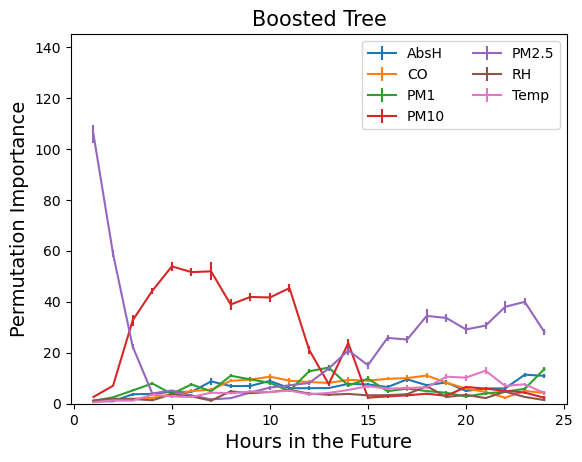

In [95]:
plt.errorbar('hour', 'AbsH', 'AbsH STD', data=bst_pi_df)
plt.errorbar('hour', 'CO', 'CO STD', data=bst_pi_df)
plt.errorbar('hour', 'PM1', 'PM1 STD', data=bst_pi_df)
plt.errorbar('hour', 'PM10', 'PM10 STD', data=bst_pi_df)
plt.errorbar('hour', 'PM2.5', 'PM2.5 STD', data=bst_pi_df)
plt.errorbar('hour', 'RH', 'RH STD', data=bst_pi_df)
plt.errorbar('hour', 'Temp', 'Temp STD', data=bst_pi_df)

plt.xlabel('Hours in the Future', fontsize=14)
plt.ylabel('Permutation Importance', fontsize=14)
plt.title('Boosted Tree', fontsize=15)
plt.ylim(0, 145)
plt.legend(ncols=2)